In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA

In [2]:
def load_emb_data(file_name):
    # load dict of arrays
    dict_data = np.load(f"../../data/processed/{file_name}.npz")
    # extract the first array
    return dict_data['arr_0']

feature_bert_vec = load_emb_data("feature_reduce_vec")
feature_index = load_emb_data("feature_reduce_index")
feature_label = load_emb_data("feature_reduce_label")

title_bert_vec = load_emb_data("title_reduce_vec")
title_index = load_emb_data("title_reduce_index")
title_label = load_emb_data("title_reduce_label")

Text(0.5, 1.0, 'Feature labels distribution')

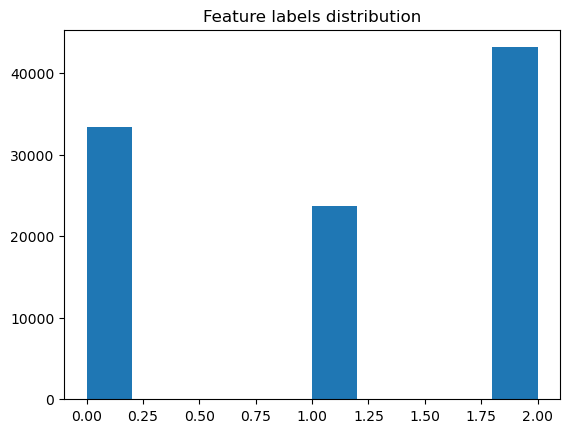

In [20]:
plt.hist(feature_label)
plt.title("Feature labels distribution")

Text(0.5, 1.0, 'Title labels distribution')

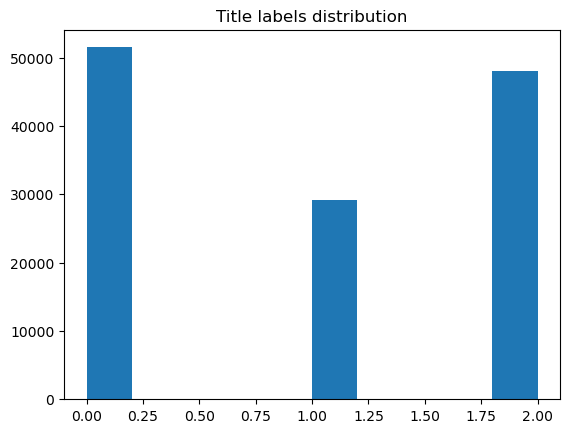

In [21]:
plt.hist(title_label)
plt.title("Title labels distribution")

# PCA

In [39]:
pca = PCA(n_components=2)
# Linear PCA
feature_2D = pca.fit_transform(feature_bert_vec)
title_2D = pca.fit_transform(title_bert_vec)

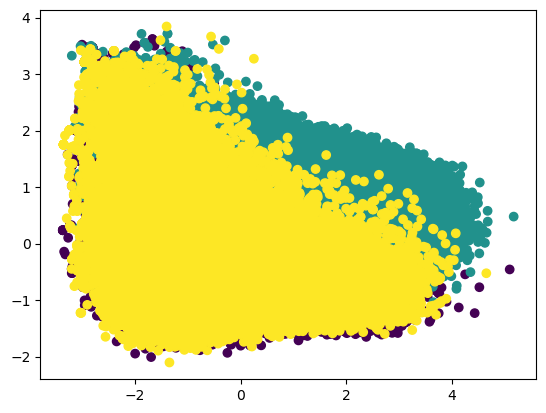

In [34]:
plt.scatter(feature_2D[:, 0], feature_2D[:, 1], c=feature_label)

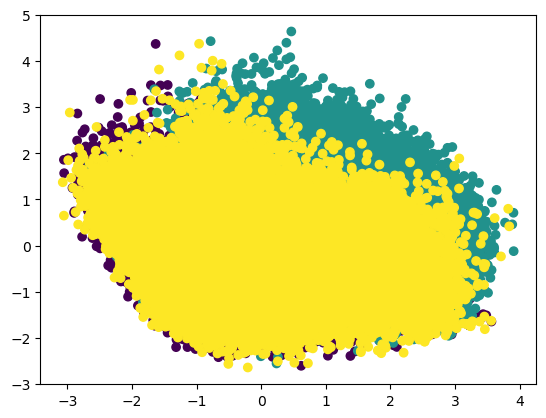

In [35]:
plt.scatter(title_2D[:, 0], title_2D[:, 1], c=title_label)

In [5]:
# kernel_pca = KernelPCA(n_components=2, kernel="rbf")

# # Kernel PCA
# # feature_k_2D = kernel_pca.fit_transform(feature_bert_vec)
# title_k_2D = kernel_pca.fit_transform(title_bert_vec)

KeyError: 2

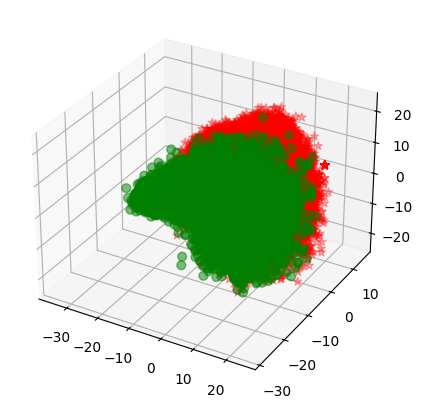

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

data = load_breast_cancer()
X = feature_bert_vec
y = feature_label
sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()